In [1]:
%load_ext hamilton.plugins.jupyter_magic

/Users/stefankrawczyk/.pyenv/versions/knowledge_retrieval-py39/lib/python3.9/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


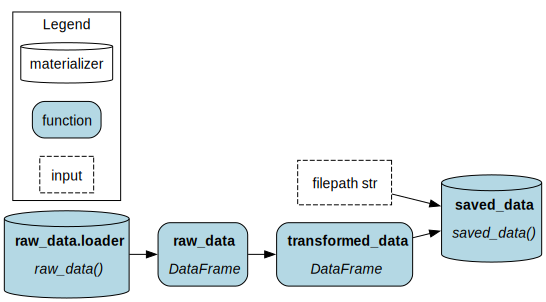

In [2]:
%%cell_to_module simple_etl --display
import pandas as pd
from sklearn import datasets
from hamilton.function_modifiers import dataloader, datasaver
from hamilton.io import utils as io_utils


@dataloader()
def raw_data() -> tuple[pd.DataFrame, dict]:
    data = datasets.load_digits()
    df = pd.DataFrame(data.data, columns=[f"feature_{i}" for i in range(data.data.shape[1])])
    metadata = io_utils.get_dataframe_metadata(df)
    return df, metadata


def transformed_data(raw_data: pd.DataFrame) -> pd.DataFrame:
    return raw_data


@datasaver()
def saved_data(transformed_data: pd.DataFrame, filepath: str) -> dict:
    transformed_data.to_csv(filepath)
    metadata = io_utils.get_file_and_dataframe_metadata(filepath, transformed_data)
    return metadata



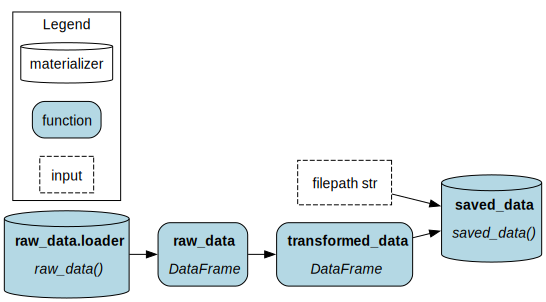

In [3]:
from hamilton_sdk import adapters

from hamilton import driver

tracker = adapters.HamiltonTracker(
    project_id=7,  # modify this as needed
    username="elijah@dagworks.io",
    dag_name="my_version_of_the_dag",
    tags={"environment": "DEV", "team": "MY_TEAM", "version": "X"},
)
dr = driver.Builder().with_config({}).with_modules(simple_etl).with_adapters(tracker).build()
dr.display_all_functions()

In [4]:
dr.execute(["saved_data"], inputs={"filepath": "data.csv"})


Capturing execution run. Results can be found at http://localhost:8241/dashboard/project/7/runs/84


Captured execution run. Results can be found at http://localhost:8241/dashboard/project/7/runs/84



{'saved_data': {'file_metadata': {'size': 499704,
   'path': 'data.csv',
   'last_modified': 1721672006.6388159,
   'timestamp': 1721697206.638992,
   'scheme': '',
   'notes': ''},
  'dataframe_metadata': {'rows': 1797,
   'columns': 64,
   'column_names': ['feature_0',
    'feature_1',
    'feature_2',
    'feature_3',
    'feature_4',
    'feature_5',
    'feature_6',
    'feature_7',
    'feature_8',
    'feature_9',
    'feature_10',
    'feature_11',
    'feature_12',
    'feature_13',
    'feature_14',
    'feature_15',
    'feature_16',
    'feature_17',
    'feature_18',
    'feature_19',
    'feature_20',
    'feature_21',
    'feature_22',
    'feature_23',
    'feature_24',
    'feature_25',
    'feature_26',
    'feature_27',
    'feature_28',
    'feature_29',
    'feature_30',
    'feature_31',
    'feature_32',
    'feature_33',
    'feature_34',
    'feature_35',
    'feature_36',
    'feature_37',
    'feature_38',
    'feature_39',
    'feature_40',
    'feature_41',